In [3]:
from dataset import load_fashion_mnist_dataset

X_train, X_test = load_fashion_mnist_dataset()

X_train.shape, X_test.shape

2025-02-02 14:56:40.833880: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 14:56:40.902584: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 14:56:40.903166: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-02 14:56:41.982519: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


((60000, 784), (10000, 784))

In [2]:
flatten_dim = X_train[0].shape[0]

In [3]:
from metrics import MeanSquaredError
from optimizer import Optimizer
from neural_network import Autoencoder

autoencoder = Autoencoder(
    input_dim=flatten_dim, code_dim=108, encoder_hidden_count=1, reduce_by=1.5
)
optimizer = Optimizer(
    autoencoder,
    loss=MeanSquaredError(),
    learning_rate=0.9,
    batch_size=32,
    epochs=5,
    early_stopping=False,
)

In [4]:
optimizer.fit(X_train, X_train)

Epoch 0  --  loss 0.048
Epoch 1  --  loss 0.029
Epoch 2  --  loss 0.025
Epoch 3  --  loss 0.023
Epoch 4  --  loss 0.021


In [3]:
from visualize import reconstruct_image

# pass model thpugh network

reconstructed = reconstruct_image(X_test[1], autoencoder)

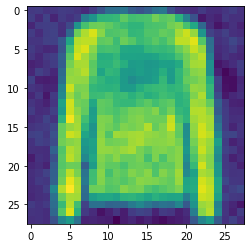

In [6]:
from matplotlib import pyplot as plt

plt.imshow(reconstructed, interpolation="nearest")
plt.show()

In [8]:
from save_model import save_model

save_model(autoencoder, "example")

In [4]:
from save_model import open_model

autoencoder = open_model("example")

In [6]:
from reasearch_metrics import mse, psnr, ssim
from visualize import deflatten

test_deflattened = deflatten(X_test[1])

mse_v = mse(reconstructed, X_test[1])
ssim_v = ssim(reconstructed, test_deflattened)

print(f"mse: {mse_v}, ssim: {ssim_v}")

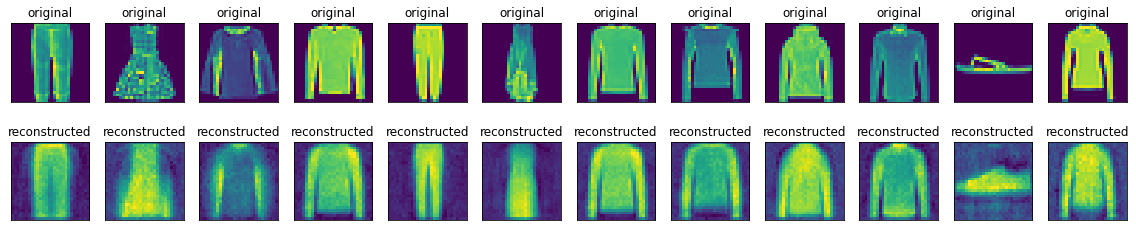

In [6]:
from numpy import random
from matplotlib import pyplot as plt

from visualize import deflatten, reconstruct_image

n = 12

plt.figure(figsize=(20, 4))
for i in range(n):
    random_index = random.randint(0, X_test.shape[0])
    current_image = X_test[random_index]

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(deflatten(current_image), interpolation="nearest")
    plt.title("original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstruct_image(current_image, autoencoder), interpolation="nearest")
    plt.title("reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()